# To explore unsupervised Machine Learning - TASK #3

In this task we predict the optimum number of clusters and represent them visually.

In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Reading the data and view details

In [40]:
# Load the iris dataset
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
data.shape

(150, 5)

In [42]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [44]:

x= data.iloc[:, [0, 1, 2, 3]].values

## Data visualization

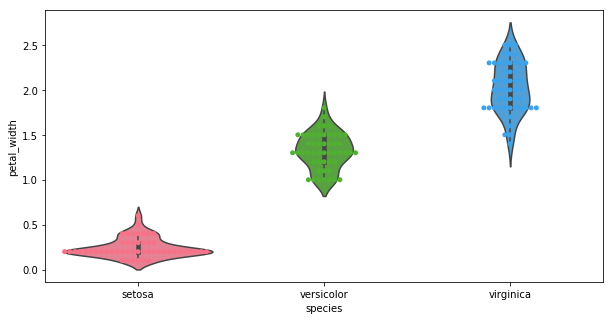

In [45]:
plt.figure(figsize=(10,5))
sns.violinplot(x="species", y="petal_width", palette="husl", data=data)
sns.swarmplot(x="species", y="petal_width", palette="husl", data=data)
plt.show()

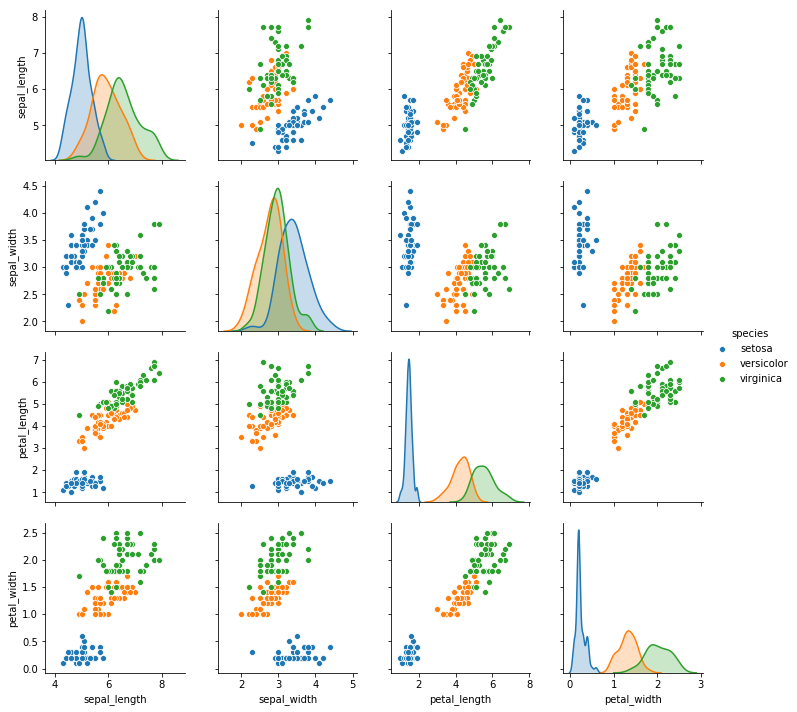

In [46]:
sns.pairplot(data, hue='species', palette=None)

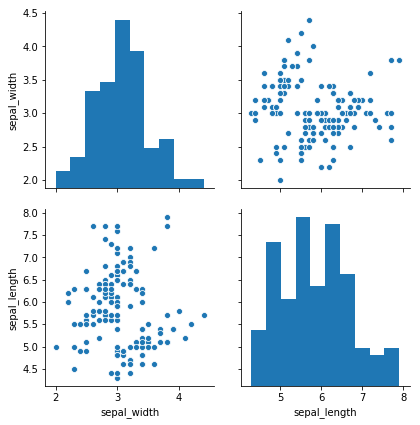

In [47]:
g = sns.pairplot(data, height=3,
                 vars=["sepal_width", "sepal_length"])

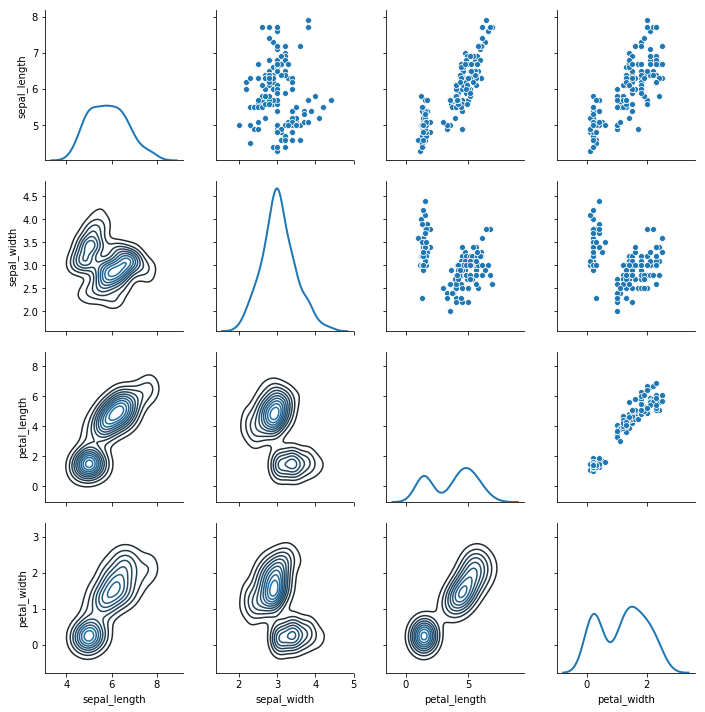

In [48]:
g = sns.PairGrid(data)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, colors=None)
g = g.map_diag(sns.kdeplot, lw=2)


# K Means Clustering

In K-Means clustering, K denotes the number of clusters. How do we know the optimum number of clusters for a given dataset. To find the optimum number of clusters, we will be using ELBOW METHOD. 

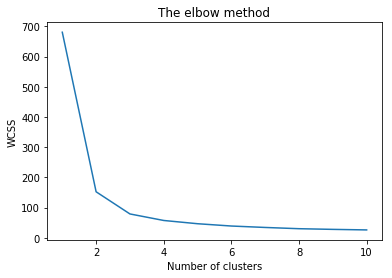

In [49]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Thus the optimum number of clusters is where the elbow occurs.

#### The optimum number of clusters is 3.

In [50]:
#Appying k means to the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(x)


In [51]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing the clusters

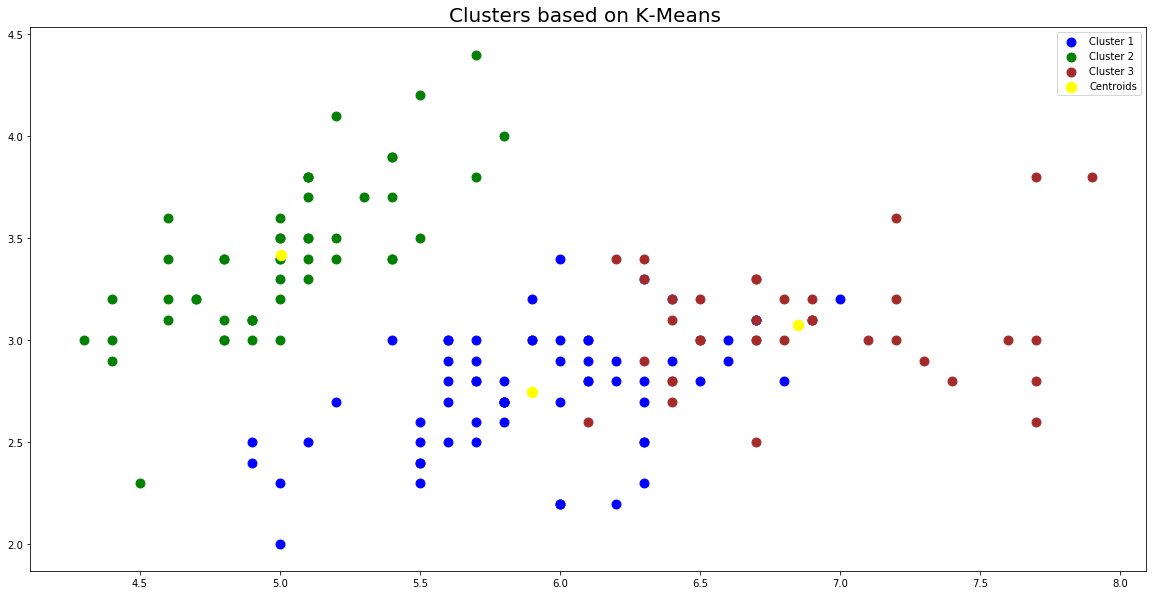

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'brown', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 110, c = 'yellow', label = 'Centroids')
plt.title('Clusters based on K-Means ',fontdict={'fontsize':20})
plt.legend()
plt.show()

Thus 3 clusters are formed with their respective centroids(yellow in color). 

### We can also use some other clustering methods such as Agglomerative Hierarchical clustering , Mean Shift Clustering , Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM) , etc. 

# END